In [1]:
import numpy as np
import matplotlib.pyplot as plt
import serial
import time

In [134]:
ser = serial.Serial('COM4')
ser.flushInput()
data = np.array(np.zeros(1))

In [135]:
while True:
    try:
        ser_bytes = ser.readline()
        try:
            decoded_bytes = float(ser_bytes[0:len(ser_bytes)-2].decode("utf-8"))
        except:
            continue
        data = np.append(data,decoded_bytes)
    except:
        print("Keyboard Interrupt")
        break


Keyboard Interrupt


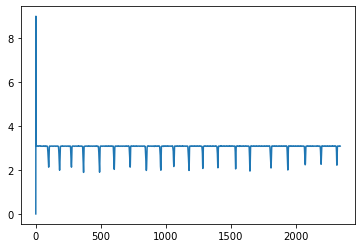

In [136]:
plt.plot(data)
plt.show()
ser.close()

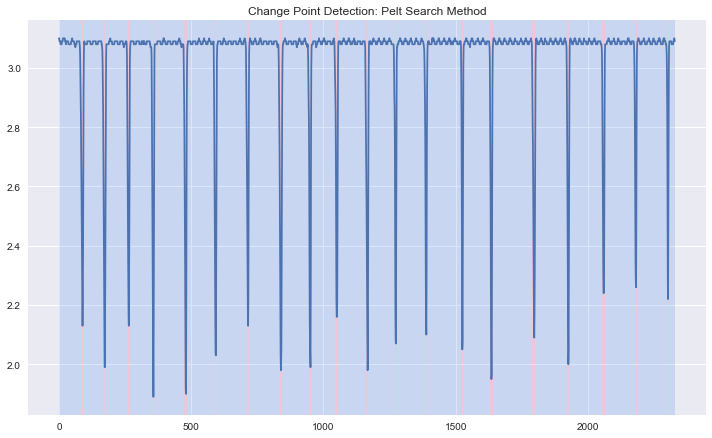

In [163]:
import ruptures as rpt

model="l2"
algo = rpt.Pelt(model=model).fit(data[10:])
result = algo.predict(pen=0.9)
rpt.display(data[10:], result, figsize=(10, 6))
plt.style.use('seaborn')
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  

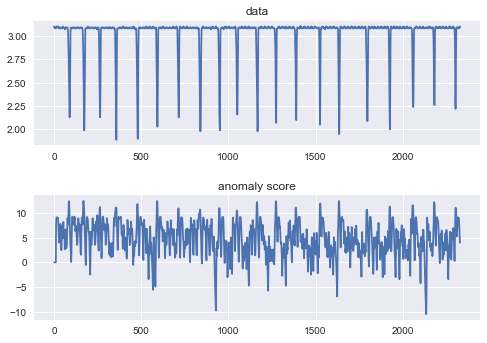

In [164]:
import changefinder as cf

detector = cf.ChangeFinder()
scores = [detector.update(point) for point in data[10:]]

f, (ax1, ax2) = plt.subplots(2, 1)
f.subplots_adjust(hspace=0.4)
ax1.plot(data[10:])
ax1.set_title("data")
ax2.plot(scores)
ax2.set_title("anomaly score")
plt.show() 

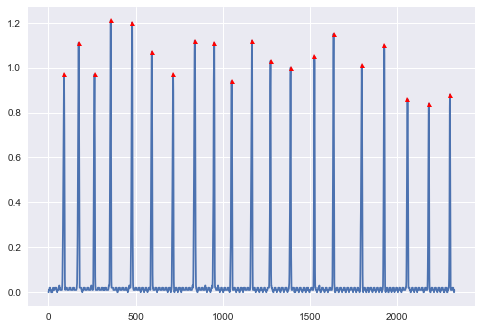

In [195]:
from scipy.signal import find_peaks

data_mod = (-data[10:])+3.1

peaks,_ = find_peaks(data_mod, height = 0.2)

plt.plot(data_mod)
plt.plot(peaks,data_mod[peaks], marker = '^', color = 'red', markersize = 5, linestyle = 'None')
plt.show()

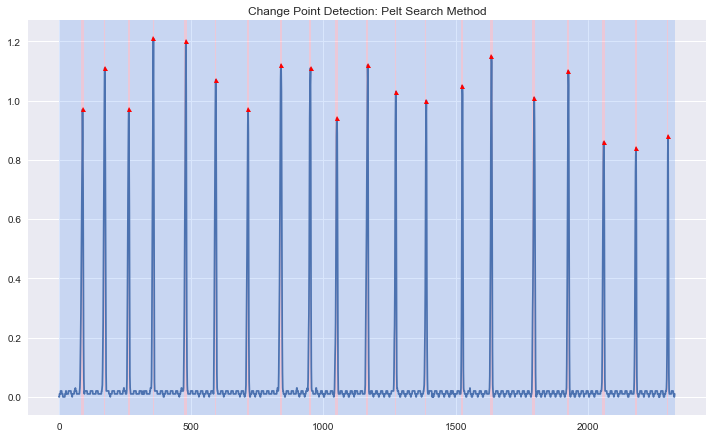

In [197]:
model="l2"
algo = rpt.Pelt(model=model).fit(data_mod)
result = algo.predict(pen=0.9)
rpt.display(data_mod, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.plot(peaks,data_mod[peaks], marker = '^', color = 'red', markersize = 5, linestyle = 'None')
plt.show()  